In [1]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("NYCTaxiFares.csv")
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.730521         -73.975499         40.744746                1  
1        40.740558         -73.974232         40.744114                1  
2        40.751118         -73.960064         40.766235                2  
3        40.756422         -73.971205         40.748192                1  
4        40.734202         -73.905956         40.743115                1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [4]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

As we can see, the minimum amount is 2.50 and the maximum fare is 50, which is in dollars($), as newyork is in the USA, which has currency in dollars.

In [5]:
df['fare_class'].value_counts()

fare_class
0    80000
1    40000
Name: count, dtype: int64

Text(0.5, 1.0, 'Class fair distribution of fare class')

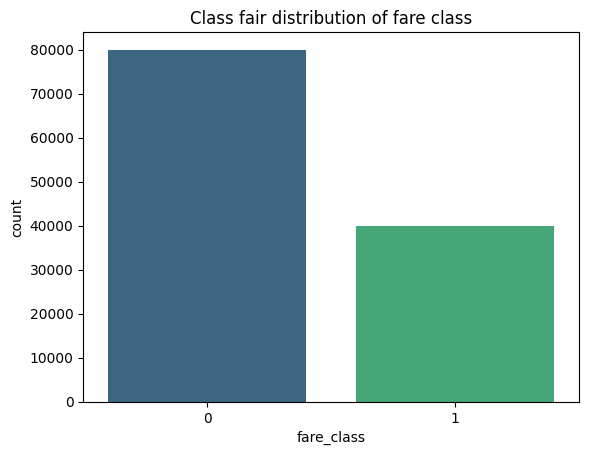

In [6]:
sns.countplot(x='fare_class',data = df,hue='fare_class', palette='viridis',legend=False)
plt.title("Class fair distribution of fare class")

In [7]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers

    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
df['Distance'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [10]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'Distance'],
      dtype='object')

---
The column "pickup_datetime" is in 'UTC', which is the global standard time for storing data. However, since we are specifically looking at the New York region, which follows a different timezone with DST, we subtract 4 hours to make it local and accurate.

In [11]:
df['Edt_date'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0       2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1       2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2       2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3       2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4       2010-04-17 02:19:01 UTC         19.7           1        -73.990976   
...                         ...          ...         ...               ...   
119995  2010-04-18 14:33:03 UTC         15.3           1        -73.955857   
119996  2010-04-23 10:27:48 UTC         15.3           1        -73.996329   
119997  2010-04-18 18:50:40 UTC         12.5           1        -73.988574   
119998  2010-04-13 08:14:44 UTC          4.9           0        -74.004449   
119999  2010-04-17 16:00:14 UTC          5.3           0        -73.955415   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.730521         -73.975499         40.744746                1   
1             40.740558         -73.974232         40.744114                1   
2             40.751118         -73.960064         40.766235                2   
3             40.756422         -73.971205         40.748192                1   
4             40.734202         -73.905956         40.743115                1   
...                 ...                ...               ...              ...   
119995        40.784590         -73.981941         40.736789                1   
119996        40.772727         -74.049890         40.740413                1   
119997        40.749772         -74.011541         40.707799                3   
119998        40.724529         -73.992697         40.730765                1   
119999        40.771920         -73.967623         40.763015                3   

        Distance            Edt_date  
0       2.126312 2010-04-19 04:17:56  
1       1.392307 2010-04-17 11:43:53  
2       3.326763 2010-04-17 07:23:26  
3       1.864129 2010-04-11 17:25:03  
4       7.231321 2010-04-16 22:19:01  
...          ...                 ...  
119995  5.751348 2010-04-18 10:33:03  
119996  5.767444 2010-04-23 06:27:48  
119997  5.052523 2010-04-18 14:50:40  
119998  1.208923 2010-04-13 04:14:44  
119999  1.427399 2010-04-17 12:00:14  

[120000 rows x 10 columns]

In [12]:
df['Hour'] = df['Edt_date'].dt.hour
df['Hour']

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Name: Hour, Length: 120000, dtype: int32

In [13]:
df['Am_or_Pm'] = np.where(df['Hour'] < 12,'Am','Pm')

In [14]:
df['Weekday'] = df['Edt_date'].dt.strftime("%a")

In [15]:
df = df.drop( columns = 'pickup_datetime')

In [16]:
df['Edt_date'].min()

Timestamp('2010-04-11 00:00:10')

In [17]:
df['Edt_date'].max()

Timestamp('2010-04-24 23:59:42')

The dataset contains the values from the 11th of April, 2010, to the 24th of April, 2010 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fare_amount        120000 non-null  float64       
 1   fare_class         120000 non-null  int64         
 2   pickup_longitude   120000 non-null  float64       
 3   pickup_latitude    120000 non-null  float64       
 4   dropoff_longitude  120000 non-null  float64       
 5   dropoff_latitude   120000 non-null  float64       
 6   passenger_count    120000 non-null  int64         
 7   Distance           120000 non-null  float64       
 8   Edt_date           120000 non-null  datetime64[ns]
 9   Hour               120000 non-null  int32         
 10  Am_or_Pm           120000 non-null  object        
 11  Weekday            120000 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)
memory usage: 10.5+ MB


Text(0.5, 1.0, 'Distance distribution')

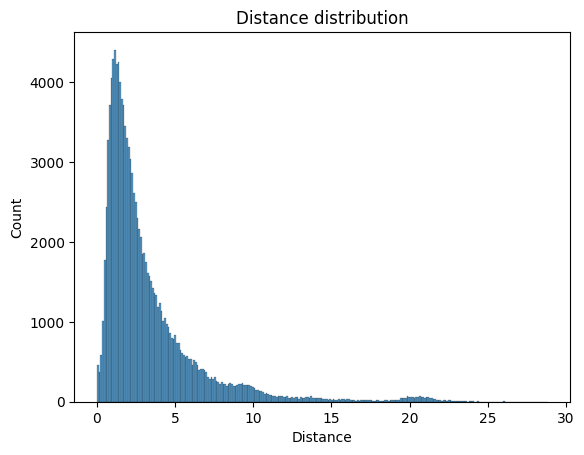

In [19]:
sns.histplot(x= 'Distance',data = df)
plt.title("Distance distribution")

Text(0.5, 1.0, 'Amount distribution')

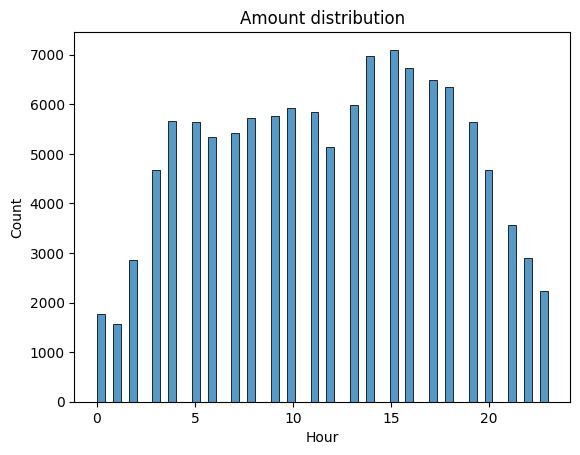

In [20]:
sns.histplot(x= 'Hour',data = df)
plt.title("Amount distribution")

Text(0.5, 1.0, 'Amount distribution')

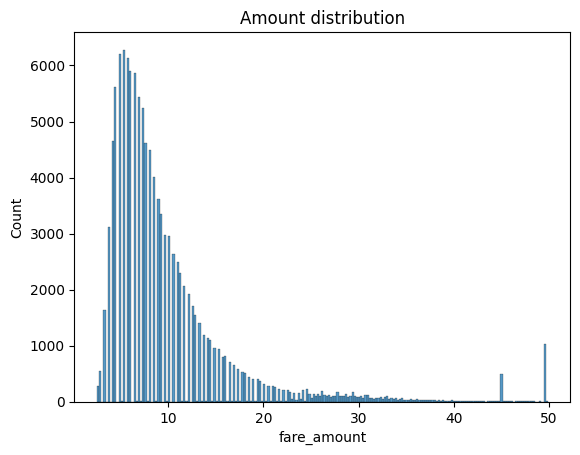

In [21]:
sns.histplot(x= 'fare_amount',data = df)
plt.title("Amount distribution")

<Axes: xlabel='Am_or_Pm', ylabel='count'>

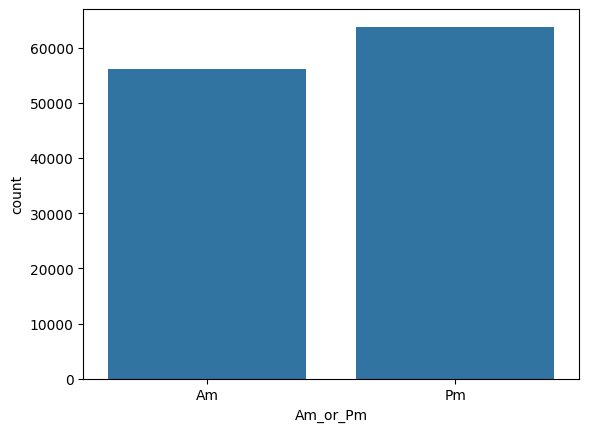

In [22]:
sns.countplot(x = 'Am_or_Pm',data=df)

<Axes: xlabel='Weekday', ylabel='count'>

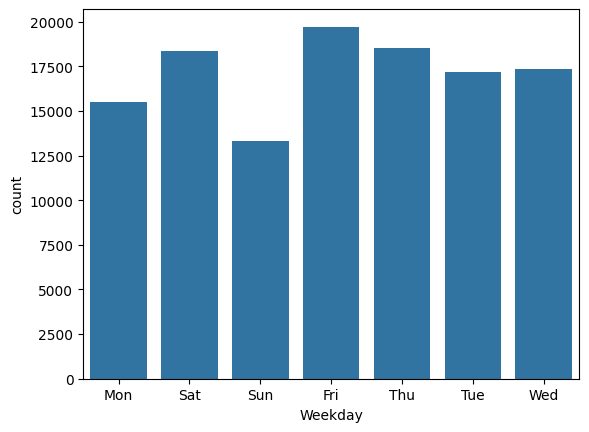

In [23]:
sns.countplot(x = 'Weekday',data=df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fare_amount        120000 non-null  float64       
 1   fare_class         120000 non-null  int64         
 2   pickup_longitude   120000 non-null  float64       
 3   pickup_latitude    120000 non-null  float64       
 4   dropoff_longitude  120000 non-null  float64       
 5   dropoff_latitude   120000 non-null  float64       
 6   passenger_count    120000 non-null  int64         
 7   Distance           120000 non-null  float64       
 8   Edt_date           120000 non-null  datetime64[ns]
 9   Hour               120000 non-null  int32         
 10  Am_or_Pm           120000 non-null  object        
 11  Weekday            120000 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)
memory usage: 10.5+ MB


In [25]:
cat_columns = ['Hour','Am_or_Pm','Weekday']
num_columns = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Distance']
y_column = 'fare_amount'

In [26]:
df['Hour'] = df['Hour'].astype('category')

In [27]:
for cols in cat_columns:
    df[cols] = df[cols].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fare_amount        120000 non-null  float64       
 1   fare_class         120000 non-null  int64         
 2   pickup_longitude   120000 non-null  float64       
 3   pickup_latitude    120000 non-null  float64       
 4   dropoff_longitude  120000 non-null  float64       
 5   dropoff_latitude   120000 non-null  float64       
 6   passenger_count    120000 non-null  int64         
 7   Distance           120000 non-null  float64       
 8   Edt_date           120000 non-null  datetime64[ns]
 9   Hour               120000 non-null  category      
 10  Am_or_Pm           120000 non-null  category      
 11  Weekday            120000 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(6), int64(2)
memory usage: 8.6 MB


Converting them into Array

In [29]:
hr = df['Hour'].cat.codes.values
ampm = df['Am_or_Pm'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]
    

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [30]:
cats = torch.tensor(cats,dtype=torch.int64)
cats.shape

torch.Size([120000, 3])

In [31]:
conts = np.stack([df[cols].values for cols in num_columns],1)
conts = torch.tensor(conts, dtype=torch.float32)
conts.shape

torch.Size([120000, 6])

In [32]:
y = torch.tensor(df[y_column].values,dtype=torch.float32).reshape(-1,1)
y.shape

torch.Size([120000, 1])

In [33]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_columns]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [34]:
cat_columns

['Hour', 'Am_or_Pm', 'Weekday']

 nn.ModuleList is a special kind of Python list provided by PyTorch. 
It's designed specifically to hold other PyTorch modules (like nn.Embedding, nn.Linear, etc.).
It acts as a container for all the separate nn.Embedding layers that you create for your categorical variables. 
The most important reason is that nn.ModuleList properly registers its contents as submodules with the main model

In [35]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [36]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take. See below for more detailed illustrations of the steps.</strong><br>

1. Extend the base Module class, set up the following parameters:
   * <tt>emb_szs: </tt>list of tuples: each categorical variable size is paired with an embedding size
   * <tt>n_cont:  </tt>int: number of continuous variables
   * <tt>out_sz:  </tt>int: output size
   * <tt>layers:  </tt>list of ints: layer sizes
   * <tt>p:       </tt>float: dropout probability for each layer (for simplicity we'll use the same value throughout)
   
<tt><font color=black>class TabularModel(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, emb_szs, n_cont, out_sz, layers, p=0.5):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the embedded layers with <a href='https://pytorch.org/docs/stable/nn.html#modulelist'><tt><strong>torch.nn.ModuleList()</strong></tt></a> and <a href='https://pytorch.org/docs/stable/nn.html#embedding'><tt><strong>torch.nn.Embedding()</strong></tt></a><br>Categorical data will be filtered through these Embeddings in the forward section.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])</font></tt><br><br>
3. Set up a dropout function for the embeddings with <a href='https://pytorch.org/docs/stable/nn.html#dropout'><tt><strong>torch.nn.Dropout()</strong></tt></a> The default p-value=0.5<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.emb_drop = nn.Dropout(emb_drop)</font></tt><br><br>
4. Set up a normalization function for the continuous variables with <a href='https://pytorch.org/docs/stable/nn.html#batchnorm1d'><tt><strong>torch.nn.BatchNorm1d()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)</font></tt><br><br>
5. Set up a sequence of neural network layers where each level includes a Linear function, an activation function (we'll use <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong>ReLU</strong></a>), a normalization step, and a dropout layer. We'll combine the list of layers with <a href='https://pytorch.org/docs/stable/nn.html#sequential'><tt><strong>torch.nn.Sequential()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_emb = sum((nf for ni,nf in emb_szs))<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_in = n_emb + n_cont<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i in layers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(n_in,i)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.ReLU(inplace=True))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.BatchNorm1d(i))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Dropout(p))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_in = i<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(layers[-1],out_sz))<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;self.layers = nn.Sequential(*layerlist)</font></tt><br><br>
6. Define the forward method. Preprocess the embeddings and normalize the continuous variables before passing them through the layers.<br>Use <a href='https://pytorch.org/docs/stable/torch.html#torch.cat'><tt><strong>torch.cat()</strong></tt></a> to combine multiple tensors into one.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;def forward(self, x_cat, x_cont):<br>
&nbsp;&nbsp;&nbsp;&nbsp;embeddings = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i,e in enumerate(self.embeds):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;embeddings.append(e(x_cat[:,i]))<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat(embeddings, 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.emb_drop(x)<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_cont = self.bn_cont(x_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat([x, x_cont], 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.layers(x)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return x</font></tt>
</div>

In [37]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [38]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4) # out_sz = 1

In [39]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [40]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [41]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [42]:
len(cat_train)

48000

In [43]:
len(cat_test)

12000

In [44]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)

    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.58560848
epoch:  26  loss: 10.91788960
epoch:  51  loss: 10.23057461
epoch:  76  loss: 9.73658276
epoch: 101  loss: 9.16369343
epoch: 126  loss: 8.39556217
epoch: 151  loss: 7.39307213
epoch: 176  loss: 6.18766689
epoch: 201  loss: 5.04765797
epoch: 226  loss: 4.18560314
epoch: 251  loss: 3.88768315
epoch: 276  loss: 3.79620385
epoch: 300  loss: 3.70662785

Duration: 155 seconds


In [45]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.69653273


In [46]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')